# Analisis exploratorio de datos 

### Librerías

In [110]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

### Descarga de datos

In [111]:
directory = '../limpieza'

df = pd.read_csv(os.path.join(directory,"SIAP.csv"))

df.head()

,Año,Mes,Cultivo,Estado,Distrito,Municipio,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha)
0,2020,1,Tomate rojo,Aguascalientes,Aguascalientes,Calvillo,16.0,6.0,0.0,90.00,15.00
1,2020,1,Tomate rojo,Baja California,Ensenada,Ensenada,19.5,0.0,0.0,0.00,0.00
2,2020,1,Tomate rojo,Baja California Sur,Mulegé,Mulegé,80.0,0.0,0.0,0.00,0.00
3,2020,1,Tomate rojo,Baja California Sur,Comondú,Comondú,127.0,0.0,0.0,0.00,0.00
4,2020,1,Tomate rojo,Baja California Sur,La Paz,La Paz,611.0,106.0,0.0,4429.76,41.79


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355334 entries, 0 to 355333
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Año                         355334 non-null  int64  
 1   Mes                         355334 non-null  int64  
 2   Cultivo                     355334 non-null  object 
 3   Estado                      355334 non-null  object 
 4   Distrito                    355334 non-null  object 
 5   Municipio                   355334 non-null  object 
 6   Superficie(ha)_Sembrada     355334 non-null  float64
 7   Superficie(ha)_Cosechada    355334 non-null  float64
 8   Superficie(ha)_Siniestrada  355334 non-null  float64
 9   Producción                  355334 non-null  float64
 10  Rendimiento(udm/ha)         355334 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 29.8+ MB


Los datos obtenidos de la página del SIAP están presentados de forma acumulativa. Es decir, cada mes tiene la producción, superficie cosechada, etc., hecha ese mes más la de los anteriores. Sin embargo, los meses de octubre, noviembre y diciembre no presentan esta tendencia. El porqué de esta situación, posiblemente se debe al cambio de año agrícola, el cual inicia en octubre y termina en marzo. Además, en estos meses, para algunos cultivos, se presentan dos tablas, cada una en un año agrícola diferente. Esto también ocurre en los primeros meses del año para algunos cultivos. 

La forma de decidir cuál tabla elegir no está clara. Se pensó en tres formas diferentes de solucionar este problema: la primera, tomar la primera tabla; la segunda, tomar la segunda tabla; y la tercera, sumar las dos tablas. Al final, optamos por la primera opción porqué es la tabla que todos los cultivos tienen. En las siguientes líneas de código, haremos que cada mes tenga los resultados de solo ese mes, quitando el carácter acumulativo. Según nuestra interpretación, a partir de octubre simplemente deja de acumular y vuelve a empezar, como se ve en la siguiente gráfica con el tomate rojo.

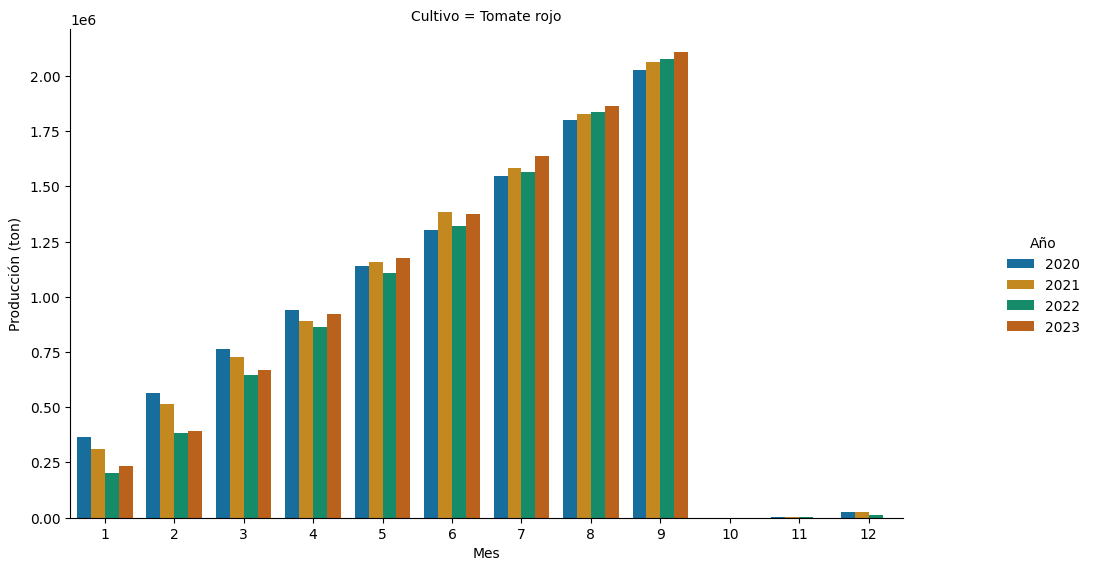

In [113]:
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Tomate rojo'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.fig.set_size_inches(12, 6)

plt.ylabel('Producción (ton)')
plt.show()

Explorando los datos, los cultivos que presentan este comportamiento son *Tomate rojo*, *Pepino*, *Brócoli*, *Cebolla*, *Sandía*, *Calabacita*, *Lechuga*, *Fresa*, *Berenjena*, *Papa* y *Melón*.  Los demás muestran la tendencia acumulativa, como se evidencia en la siguiente gráfica del *Mango*.

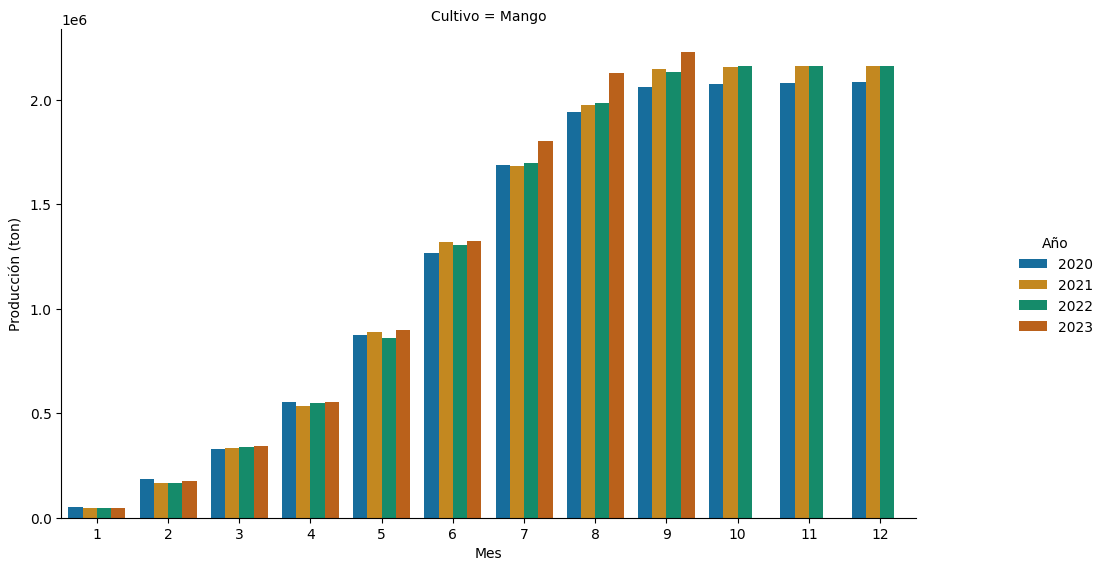

In [114]:
g = sns.catplot(x='Mes', y='Producción', data=df[df['Cultivo'] == 'Mango'], estimator=sum,
                hue='Año', kind='bar', row='Cultivo', errorbar=None)
g.fig.set_size_inches(12, 6)

plt.ylabel('Producción (ton)')
plt.show()

En las siguientes dos gráficas vemos la producción por cultivo y los registros por cultivo globales. De la gráfica 'Registros por cultivo' vemos que el *Frijol*, *Limon* y *Tomate rojo* son los que tenien más registros, lo cual ya habiamos observado en el `pandas profiling`. Esto es, son los cultvios más sembrados alrededor del pais. Por otro lado, la *Berenjena*, *Pinia*, *Fresa* y *Frambuesa* son las menos sembradas. Por otra parte, en la gráfica 'Producción por cultivo' se observa que la *Naranja* es el cultivo más producido en el pais, seguido por el *Limon*, *Platano* y *Mango*. En la gráfica 'Superficie siniestrada por cultivo' vemos al *Frijol* y a la *Sandia* como los cultivos con mayor superfice siniestrada y por una gran diferencia. Por último, en 'Superficie siniestrada por estado' vemos que *Veracruz* y *Zacatercas* son los estados con mayor superficie siniestrada.

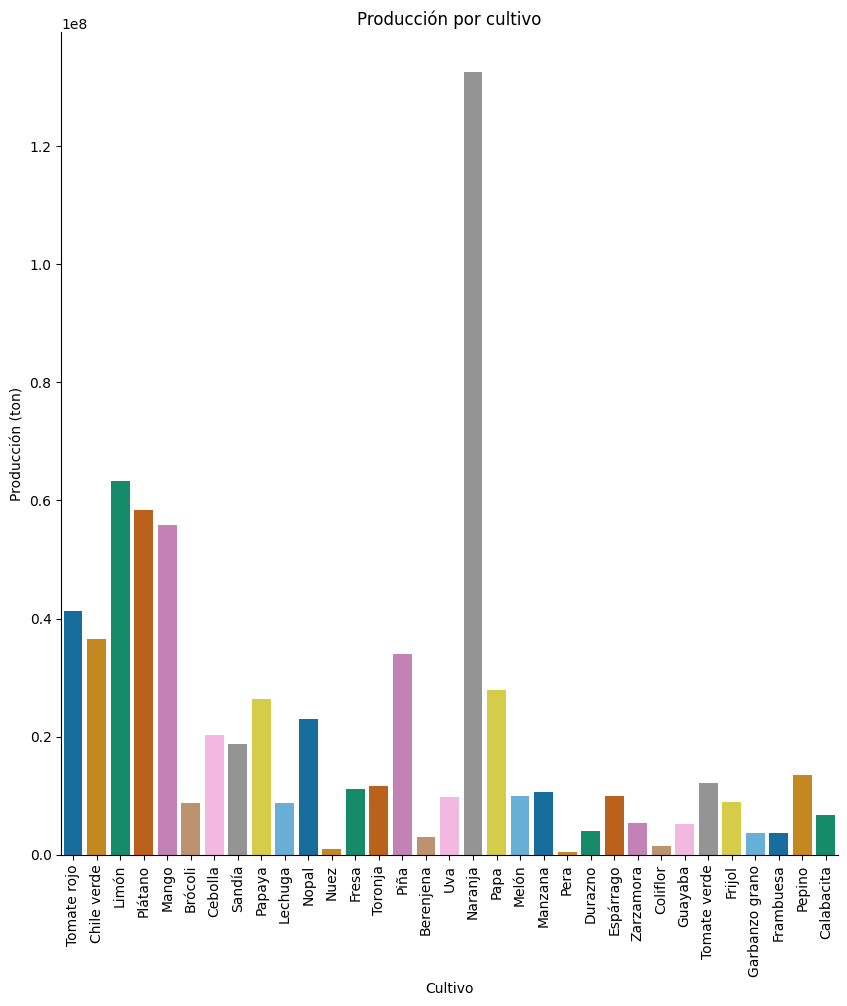

In [115]:
g = sns.catplot(x='Cultivo', y='Producción', data=df, kind='bar', estimator=sum, 
                errorbar=None, palette='colorblind')
g.fig.set_size_inches(10, 10)

plt.xticks(rotation=90)
plt.ylabel('Producción (ton)')
plt.title('Producción por cultivo')
plt.show()

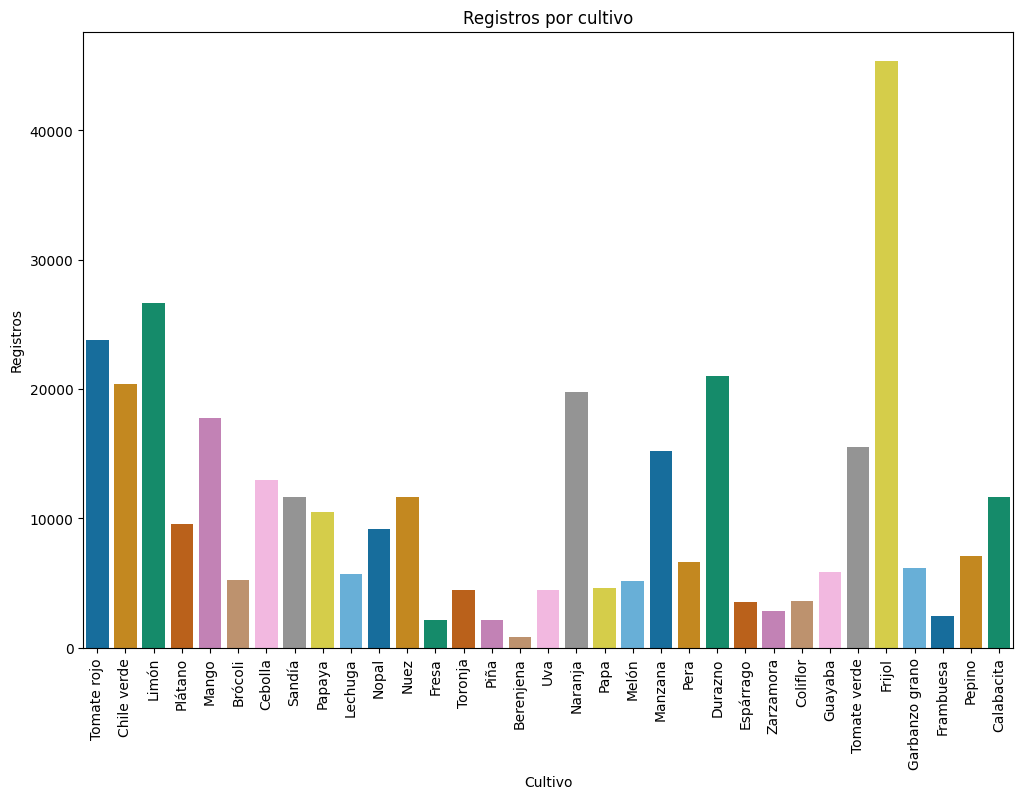

In [119]:
plt.figure(figsize=(12, 8))
g = sns.countplot(x='Cultivo', data= df, palette='colorblind')
plt.xticks(rotation=90)
plt.ylabel('Registros')
plt.title('Registros por cultivo')
plt.show()

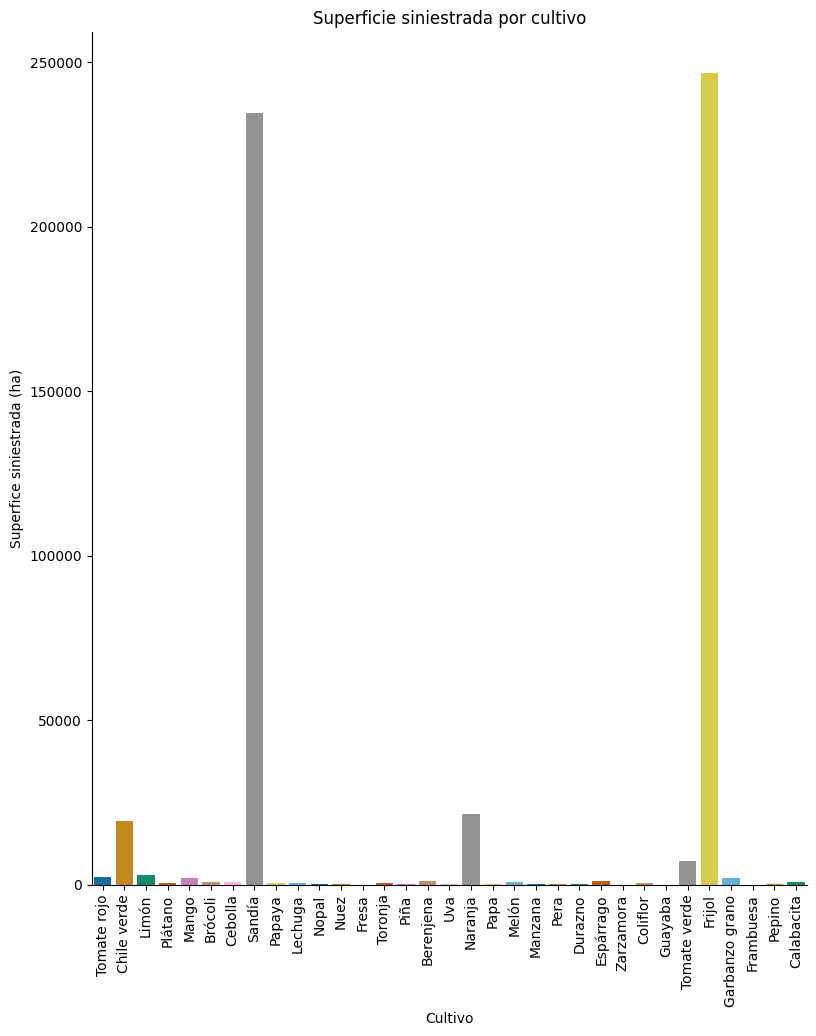

In [117]:
g = sns.catplot(x='Cultivo', y='Superficie(ha)_Siniestrada', data=df, kind='bar', estimator=sum, 
                errorbar=None, palette='colorblind')
g.fig.set_size_inches(10, 10)
plt.xticks(rotation=90)
plt.ylabel('Superfice siniestrada (ha)')
plt.title('Superficie siniestrada por cultivo')
plt.show()

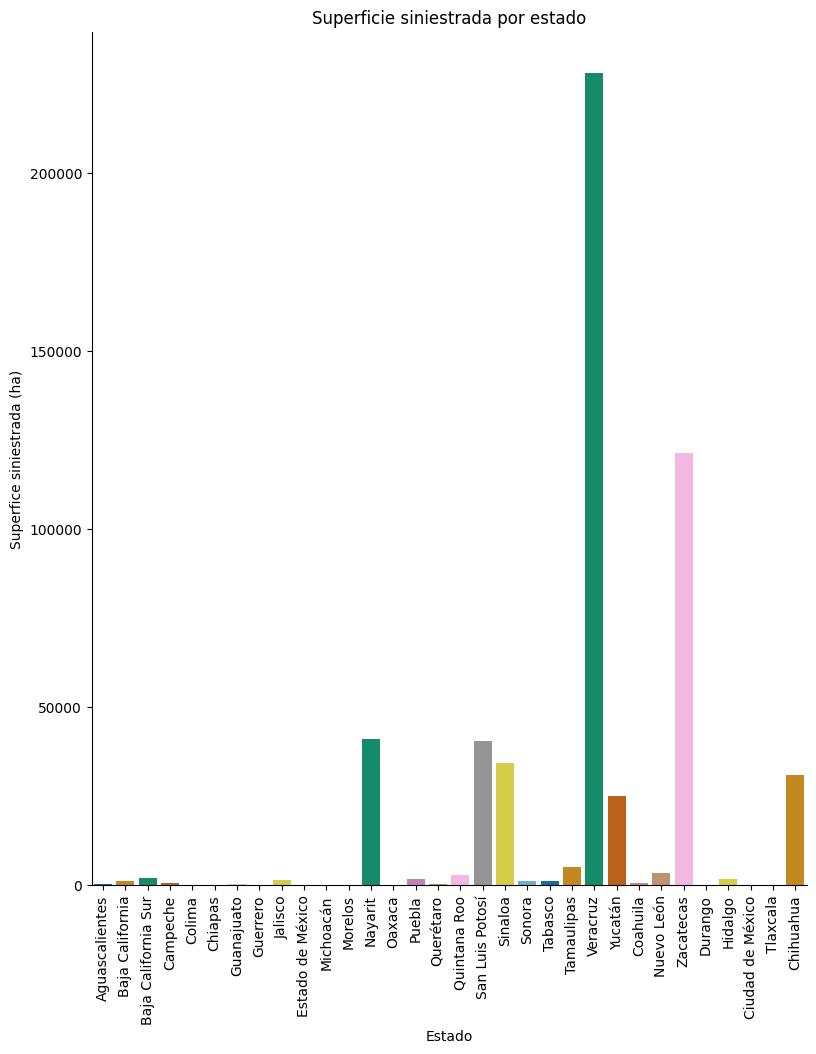

In [122]:
g = sns.catplot(x='Estado', y='Superficie(ha)_Siniestrada', data=df, kind='bar', estimator=sum, 
                errorbar=None, palette='colorblind')
g.fig.set_size_inches(10, 10)
plt.xticks(rotation=90)
plt.ylabel('Superfice siniestrada (ha)')
plt.title('Superficie siniestrada por estado')
plt.show()

Ahora veremos las correlaciones de nuestras variables numéricas. 

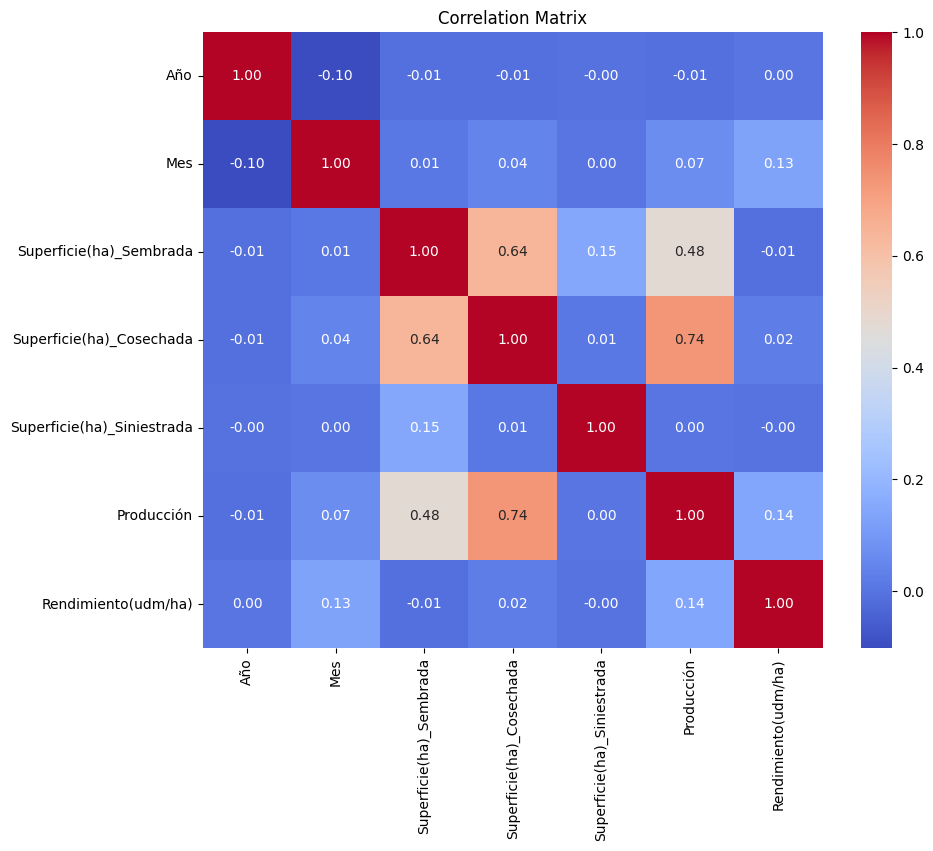

In [137]:
# Seleccionamos solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Hacemos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Observamos que 'Producción', 'Superficie(ha)_Cosechada' y 'Rendimiento(udm/ha)' tienen una alta correlación. Si las graficamos vemos que tienen una relación lineal estas variables.

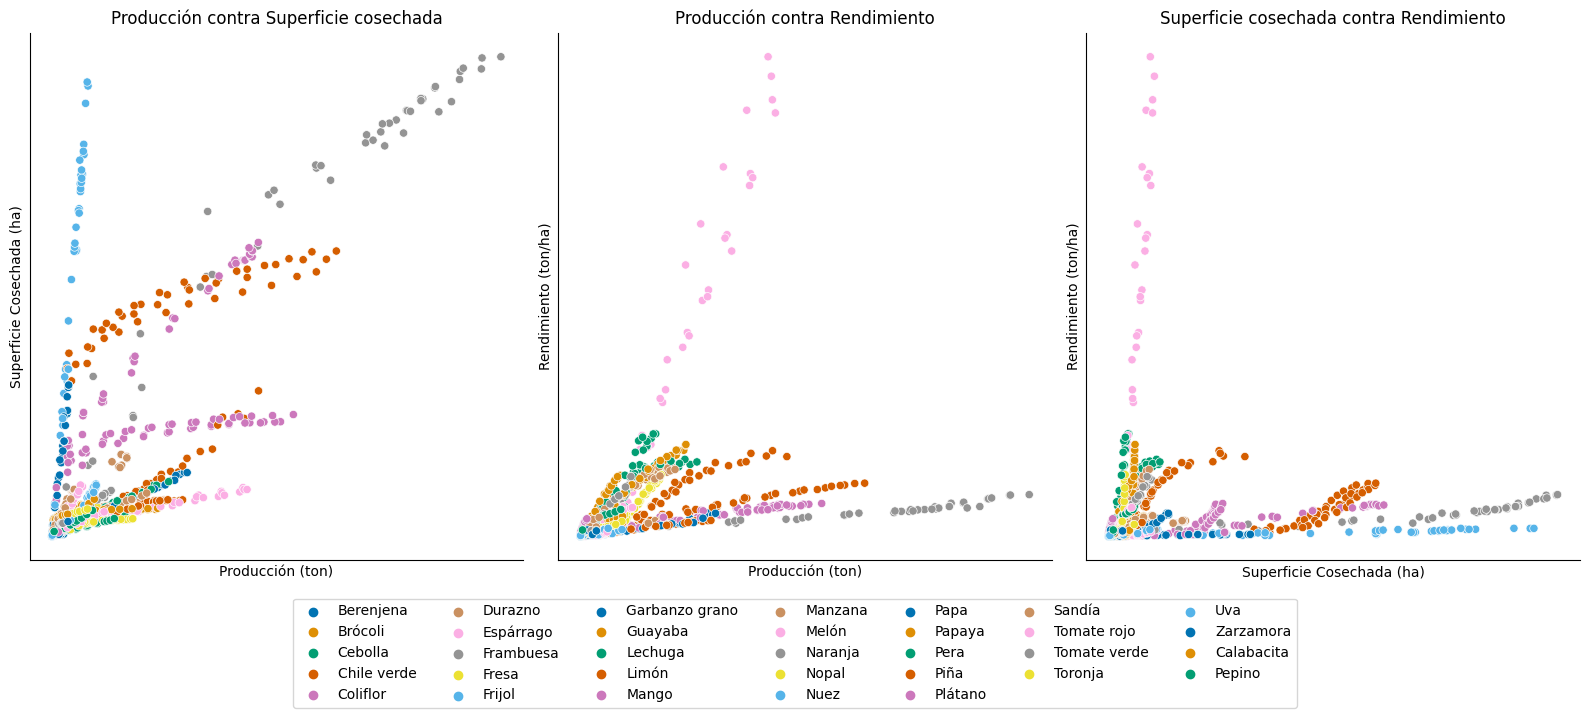

In [158]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Producción contra Superficie cosechada
scatter1_data = df.groupby(['Año', 'Mes', 'Cultivo'])[['Producción', 'Superficie(ha)_Cosechada']].sum().reset_index()
sns.scatterplot(x='Producción', y='Superficie(ha)_Cosechada', hue='Cultivo', data=scatter1_data, ax=axes[0], palette='colorblind')
axes[0].set_title('Producción contra Superficie cosechada')
axes[0].set_xlabel('Producción (ton)')
axes[0].set_ylabel('Superficie Cosechada (ha)')
axes[0].legend().set_visible(False)
axes[0].get_xaxis().set_ticks([])
axes[0].get_yaxis().set_ticks([])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['bottom'].set_visible(False)
# axes[0].spines['left'].set_visible(False)

# Producción contra Rendimiento
scatter2_data = df.groupby(['Año', 'Mes', 'Cultivo'])[['Producción', 'Rendimiento(udm/ha)']].sum().reset_index()
sns.scatterplot(x='Producción', y='Rendimiento(udm/ha)', hue='Cultivo', data=scatter2_data, ax=axes[1], palette='colorblind')
axes[1].set_title('Producción contra Rendimiento')
axes[1].set_xlabel('Producción (ton)')
axes[1].set_ylabel('Rendimiento (ton/ha)')
axes[1].legend().set_visible(False)
axes[1].get_xaxis().set_ticks([])
axes[1].get_yaxis().set_ticks([])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Superficie cosechada contra Rendimiento
scatter3_data = df.groupby(['Año', 'Mes', 'Cultivo'])[['Superficie(ha)_Cosechada', 'Rendimiento(udm/ha)']].sum().reset_index()
sns.scatterplot(x='Superficie(ha)_Cosechada', y='Rendimiento(udm/ha)', hue='Cultivo', data=scatter3_data, ax=axes[2], palette='colorblind')
axes[2].set_title('Superficie cosechada contra Rendimiento')
axes[2].set_xlabel('Superficie Cosechada (ha)')
axes[2].set_ylabel('Rendimiento (ton/ha)')
axes[2].legend().set_visible(False)
axes[2].get_xaxis().set_ticks([])
axes[2].get_yaxis().set_ticks([])
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Legendas
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=7)

plt.tight_layout()
plt.show()



Haciendo una exploración de estas variables vemos que 'Rendimiento(udm/ha)' es la variable 'Producción' entre la variable 'Superficie(ha)_Cosechada', como se ve en las siguiente celda. Las ligeras diferencias entre el 'Rendimiento(udm/ha)' calculado y el original se debe al redondeo como se muestra.

In [160]:
# Calcualamos 'Rendimiento(udm/ha)'
df_compare = round((df['Producción'] / df['Superficie(ha)_Cosechada']).fillna(0), 2)
booleanDf = df_compare == df['Rendimiento(udm/ha)']

# Creamos un dataframe con los registros que no son iguales y comparamos los originales con
# los calculados
df_visualize = pd.DataFrame({
    'Rendimiento(udm/ha)_df': df.loc[~booleanDf, 'Rendimiento(udm/ha)'],
    'Rendimiento(udm/ha)_df_compare': df_compare.loc[~booleanDf],
})
print(df_visualize)

        Rendimiento(udm/ha)_df  Rendimiento(udm/ha)_df_compare
1021                      1.33                            1.32
1235                      0.97                            0.98
2793                      1.17                            1.18
3269                     39.69                           39.68
3598                      0.58                            0.57
...                        ...                             ...
353783                    1.55                            1.56
354615                    1.73                            1.72
354845                    1.05                            1.04
354858                    0.99                            1.00
354864                    1.00                            1.01

[1282 rows x 2 columns]


Con respecto a los datos atípicos, para todas las variables numéricas en función del cultivo, existen muchos valores atípicos, como se ve en la siguiente gráfica. Decidimos no quitarlos por si hay una relación con estos datos y las variables de clima de otros dataframes. Principalmente este comportamiento se debe a la gran cantidad de registros con valor 0, como vimos al realizar el `pandas profiling`.

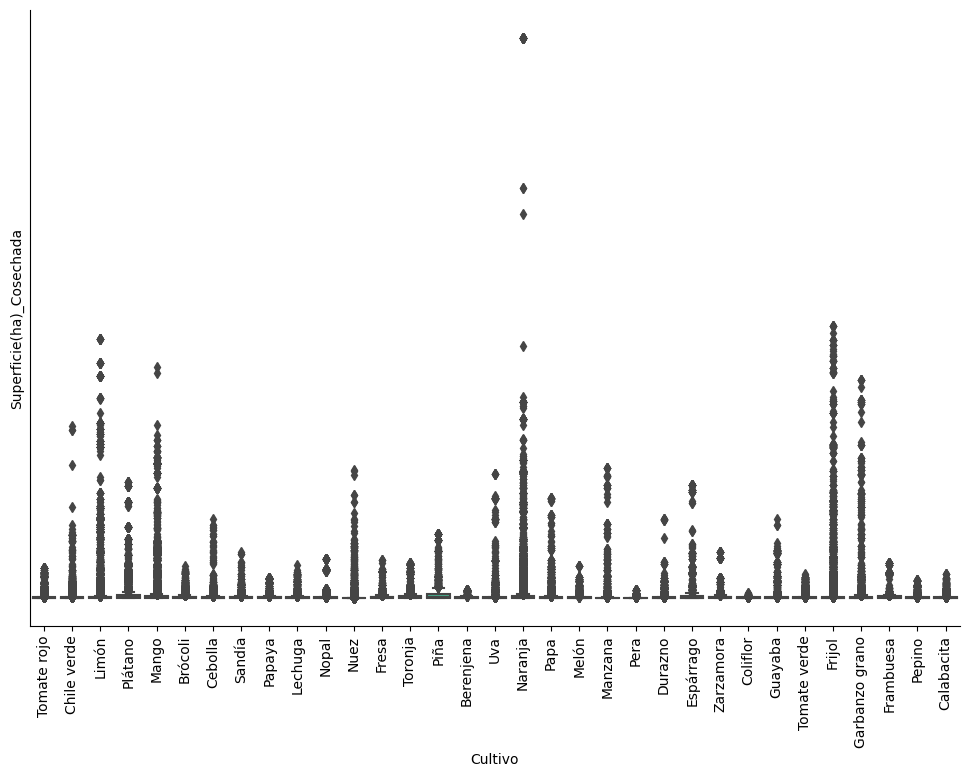

In [228]:
plt.figure(figsize=(12, 8))
# sns.boxplot(x='Cultivo', y='Superficie(ha)_Sembrada', data=df)
sns.boxplot(x='Cultivo', y='Superficie(ha)_Cosechada', data=df)
# sns.boxplot(x='Cultivo', y='Superficie(ha)_Siniestrada', data=df)
# sns.boxplot(x='Cultivo', y='Producción', data=df)
plt.yticks([])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation=90)
plt.show()

Por último, revisaremos las variables a través del tiempo. Haciendo esto, encontramos que la superficie siniestrada es prácticamente 0 desde finales de 2020 hasta inicios de 2023, teniendo un repunte considerable a partir de julio del 2023.

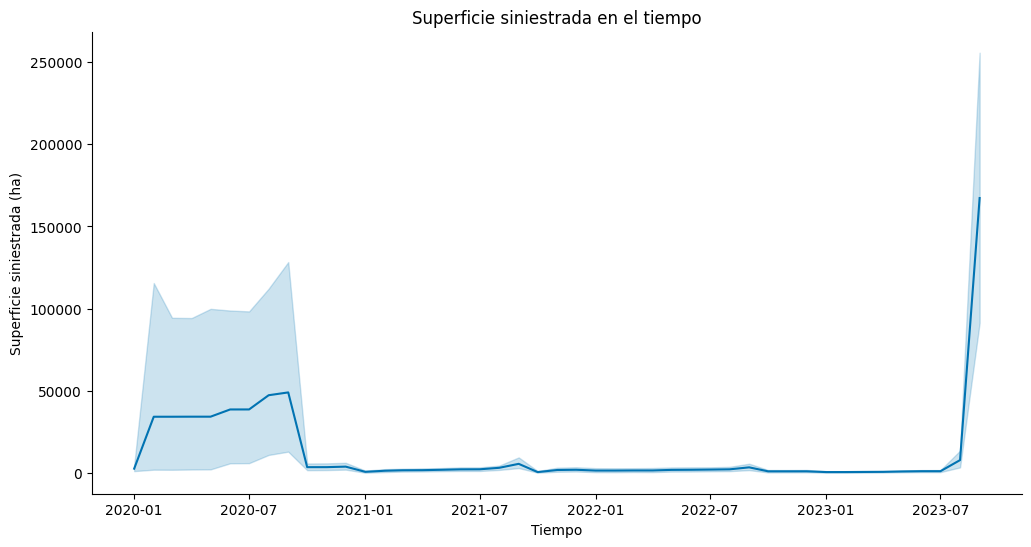

In [226]:
# Agregamos una variable tipo Datetime para hacer el análisis
df['Date'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Superficie(ha)_Siniestrada', data=df, estimator=sum)
df = df.drop('Date', axis=1)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('Superficie siniestrada (ha)')
plt.xlabel('Tiempo')
plt.title('Superficie siniestrada en el tiempo')
plt.show()